<a href="https://colab.research.google.com/github/anubhavgupta1/DeepLearning/blob/master/11_FeedForward_Networks_With_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Recap of data
* Feedforward network with Pytorch tensors and autograd
* Using Pytorch's NN -> Functional, Linear, Sequential & Pytorch's Optim
* Moving things to CUDA

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import optim

In [4]:
torch.manual_seed(0)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

## Generate Dataset

In [6]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


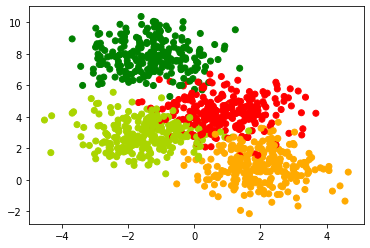

In [7]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


## Using torch tensors and autograd

In [0]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val)) #conversion into torch tensors

In [10]:
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [11]:
#Forward Pass
a = torch.rand(2,4)
print(a)


tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964]])


In [12]:
#Forward Pass
b = a.exp()
print(b)


tensor([[1.6426, 2.1559, 1.0925, 1.1411],
        [1.3599, 1.8853, 1.6325, 2.4509]])


In [13]:
#Forward Pass
print(b.sum(0)) # returns sum of columns 


tensor([3.0025, 4.0412, 2.7250, 3.5920])


In [14]:
#Forward Pass
print(b.sum(1)) # returns sum of rows

tensor([6.0321, 7.3285])


In [15]:
#Forward Pass
print(b.sum(-1)) # returns sum of rows

tensor([6.0321, 7.3285])


In [16]:
#Forward Pass
print(b.sum(-1).shape) # 1 x 2
print(b.sum(-1).unsqueeze(-1).shape) # 2 x 1

torch.Size([2])
torch.Size([2, 1])


In [17]:
#Forward Pass
c = b.sum(-1).unsqueeze(-1)
d = c.sum(-1).unsqueeze(-1)
print(b)
print(c)

tensor([[1.6426, 2.1559, 1.0925, 1.1411],
        [1.3599, 1.8853, 1.6325, 2.4509]])
tensor([[6.0321],
        [7.3285]])


In [18]:
#Forward Pass
d = b/c
print(d) #softmax


tensor([[0.2723, 0.3574, 0.1811, 0.1892],
        [0.1856, 0.2573, 0.2228, 0.3344]])


In [19]:
#Forward Pass
print( d.sum(-1).unsqueeze(-1))

tensor([[1.0000],
        [1.0000]])


In [20]:
# average Cross Entropy Loss
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])
y = torch.tensor([2, 0])
print(y)

tensor([2, 0])


In [21]:
# average Cross Entropy Loss
t1 = y_hat.shape[0]
print(t1)

2


In [22]:
# average Cross Entropy Loss
t2 = range(t1)
print(t2)

range(0, 2)


In [23]:
# average Cross Entropy Loss
t3 = y_hat[t2, y]
print(t3)

tensor([0.3000, 0.8000])


In [24]:
# average Cross Entropy Loss
t4 = t3.log()
print(t4)

tensor([-1.2040, -0.2231])


In [25]:
# average Cross Entropy Loss
t5 = -t4
print(t5)

tensor([1.2040, 0.2231])


In [26]:
# average Cross Entropy Loss
t6 = t5.mean()
print(t6.item())

0.7135581970214844


In [27]:
# average accuracy find if index in y and index of largest value in y_hat matches 
t11 = torch.argmax(y_hat, dim=1) # returns the index of highest value
print(t11)

tensor([3, 0])


In [28]:
# average accuracy find if index in y and index of largest value in y_hat matches 
t12 = (t11 ==y) #returns boolean value
t12

tensor([False,  True])

In [29]:
# average accuracy find if index in y and index of largest value in y_hat matches 
t13 = t12 .float()
t13

tensor([0., 1.])

In [30]:
# average accuracy find if index in y and index of largest value in y_hat matches 
t14 = t13.mean()
print(t14.item())
#( == y).float().mean().item()

0.5


![alt text](https://drive.google.com/uc?id=1Wnpd44PTe27Hcxv_5m2hGfv3ef7i00dI)

In [0]:
# Forward Propagation using PyTorch
def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
  h1 = a1.sigmoid() # (N, 2); PyTorch sigmoid function
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4); softmax applied
  return h2

In [0]:
# Cross Entropy Loss
def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [0]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

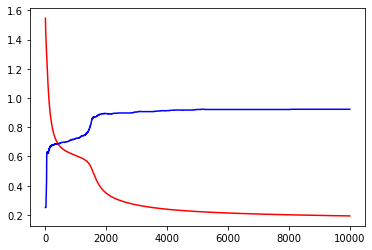

Loss before training 1.5456441640853882
Loss after training 0.19288592040538788


In [34]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2) #xavier initialisation
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True) 

weights2 = torch.randn(2, 4) / math.sqrt(2) #xavier initialisation
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

## Using NN.Functional

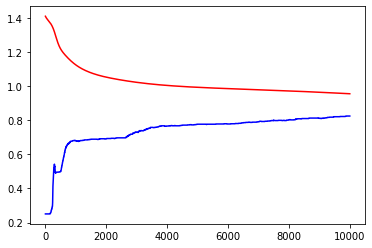

Loss before training 1.4111980199813843
Loss after training 0.9561843872070312


In [35]:
# import torch.nn.functional as F
# all is same except cross - entropy loss

torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, Y_train) # torch cross - entropy loss function
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

## Using NN.Parameter

In [0]:
#import torch.nn as nn

In [0]:
class FirstNetwork(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))
    
  def forward(self, X):
    a1 = torch.matmul(X, self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

In [0]:
def fit(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    with torch.no_grad():
      for param in fn.parameters():
        param -= learning_rate * param.grad
      fn.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

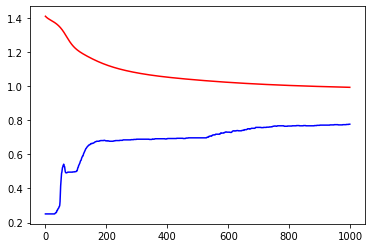

Loss before training 1.4111980199813843
Loss after training 0.9939236044883728


In [39]:
fn = FirstNetwork()
fit()

## Using NN.Linear and Optim

In [0]:
#import torch.nn as nn
# fit function remains same 

class FirstNetwork_v1(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2, 2) # 2x 2 wights + 2 bias
    self.lin2 = nn.Linear(2, 4) # 2x 4 wights + 4 bias
    
  def forward(self, X):
    a1 = self.lin1(X) #torch.matmul(X, self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = self.lin2(h1) #torch.matmul(h1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

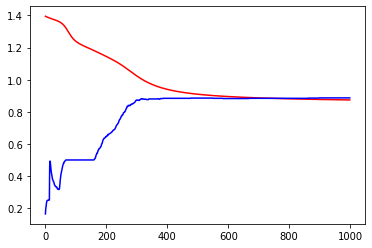

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [41]:
fn = FirstNetwork_v1()
fit()

In [0]:
#from torch import optim
def fit_v1(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate) # here we can use any optimization algo
  
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    """
    with torch.no_grad():
      for param in fn.parameters():
        param -= learning_rate * param.grad
    """
    opt.step()
    opt.zero_grad() #fn.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

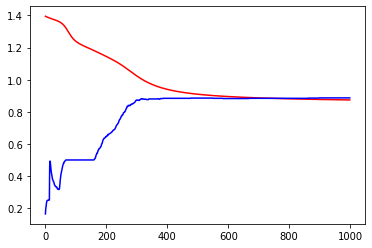

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [43]:
fn = FirstNetwork_v1()
fit_v1()

## Using NN.Sequential

In [0]:
#import torch.nn as nn

class FirstNetwork_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2), 
        nn.Sigmoid(), 
        nn.Linear(2, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

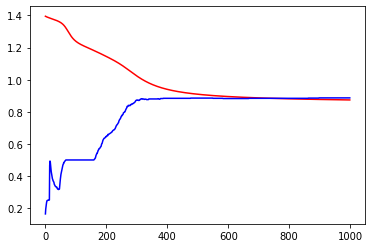

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [45]:
fn = FirstNetwork_v2()
fit_v1()

In [0]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
  
  for epoch in range(epochs):
    loss = loss_fn(model(x), y) # model(x) = fn(x) = y_hat

    loss.backward()
    opt.step()
    opt.zero_grad()
    
  return loss.item()

In [47]:
#import torch.nn.functional as F
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

0.8738410472869873

## Running it on GPUs

In [48]:
device = torch.device("cpu")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.395160436630249
Time taken 0.9461483955383301


In [49]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3951594829559326
Time taken 1.0171802043914795


In [0]:
class FirstNetwork_v3(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 128), 
        nn.Sigmoid(), 
        nn.Linear(128, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [51]:
device = torch.device("cpu")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3985880613327026
Time taken 1.8939893245697021


In [52]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.398587942123413
Time taken 0.9566264152526855


In [0]:
class FirstNetwork_v4(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 1024), 
        nn.Sigmoid(), 
        nn.Linear(1024, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [54]:
device = torch.device("cpu")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v4()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3988277912139893
Time taken 8.083106279373169


In [55]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v4()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3988269567489624
Time taken 0.9487638473510742


In [0]:
class FirstNetwork_v5(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 1024*4), 
        nn.Sigmoid(), 
        nn.Linear(1024*4, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [57]:
device = torch.device("cpu")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v5()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3890225887298584
Time taken 31.127265214920044


In [58]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v5()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3890228271484375
Time taken 0.9523200988769531
